In [1]:
# Import Necessary Libraries

import pandas as pd
import numpy as np
import string
import spacy
import nltk
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# Import Dataset
data = pd.read_csv("D:\ExcelR\Data Science\Assignments\Text Mining\Elon_musk.csv", encoding='latin-1')
data.drop(columns='Unnamed: 0')
data

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Suraj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Suraj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Suraj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
# Function to remove various patterns using 'Regular Expression'

def clean_text(text):
    
    text = re.sub('@[A-Za-z0-9]+','',str(text)) #to remove @
    text = re.sub('#','',str(text)) #to remove#
    text = re.sub('RT[\s]+','',str(text)) #to remove retweets
    text = re.sub('\n\n','',str(text)) #to remove \n
    text = text.lower()
    text = re.sub('http?:\/\/\S+','',str(text)) #to remove links
    text = text.translate(str.maketrans('','', string.punctuation))
    
    return text

data['Text']=data["Text"].apply(clean_text)
data

,Unnamed: 0,Text
0,1,im an alien
1,2,aacarmack ray tracing on cyberpunk with hdr is...
2,3,great interview
3,4,doge is underestimated
4,5,congratulations tesla china for amazing execu...
...,...,...
1994,1995,true it sounds so surreal but the negative pr...
1995,1996,make sure to read ur terms amp conditions bef...
1996,1997,samwise gamgee
1997,1998,altho dumb and dumber is u0001f525u0001f525


In [7]:
elon = data.Text
elon_string = " ".join(elon)
elon_string

' i\x92m an alien aacarmack ray tracing on cyberpunk with hdr is nextlevel have you tried it   great interview  doge is underestimated  congratulations tesla china for amazing execution last year now on to the next for even more happy new year of the ox httpstco9wfkmyu2oj frodo was the underdoge\nall thought he would fail\nhimself most of all httpstcozgxjfdzzrm    haha thanks    indeed tweets definitely do not represent realworld time allocation the most entertaining outcome is the most likely  just sent some just agree to do clubhouse with  httpstco3rwe9uhsts   it\x92s getting real bought some dogecoin for lil x so he can be a toddler hodler  he definitely has issues but the sentencing seems a bit high  thanks for fixing  please unlock my account  u0001f923u0001f923 this is true power haha httpstcofc9uhqsd7o  any crypto wallet that won\x92t give you your private keys should be avoided at all costs  your app sucks  nasa has selected falcon heavy to launch the first two elements of the 

In [8]:
text_tokens = word_tokenize(elon_string)
print(text_tokens)

['i\x92m', 'an', 'alien', 'aacarmack', 'ray', 'tracing', 'on', 'cyberpunk', 'with', 'hdr', 'is', 'nextlevel', 'have', 'you', 'tried', 'it', 'great', 'interview', 'doge', 'is', 'underestimated', 'congratulations', 'tesla', 'china', 'for', 'amazing', 'execution', 'last', 'year', 'now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'happy', 'new', 'year', 'of', 'the', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'was', 'the', 'underdoge', 'all', 'thought', 'he', 'would', 'fail', 'himself', 'most', 'of', 'all', 'httpstcozgxjfdzzrm', 'haha', 'thanks', 'indeed', 'tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'the', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'just', 'sent', 'some', 'just', 'agree', 'to', 'do', 'clubhouse', 'with', 'httpstco3rwe9uhsts', 'it\x92s', 'getting', 'real', 'bought', 'some', 'dogecoin', 'for', 'lil', 'x', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler', 'he', 'definitely', 'has', 'issues', 'but', 'the', 'sente

In [9]:
with open ("D:\ExcelR\Data Science\Assignments\Text Mining\stop.txt") as sw:
    stop_words = sw.read()
stop_words = stop_words.split('\n')

In [10]:
tweets_no_sw=[word for word in text_tokens if word not in stop_words]
tweets_no_sw

['i\x92m',
 'alien',
 'aacarmack',
 'ray',
 'tracing',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'great',
 'interview',
 'doge',
 'underestimated',
 'congratulations',
 'tesla',
 'china',
 'amazing',
 'execution',
 'year',
 'happy',
 'year',
 'ox',
 'httpstco9wfkmyu2oj',
 'frodo',
 'underdoge',
 'thought',
 'fail',
 'httpstcozgxjfdzzrm',
 'haha',
 'tweets',
 'represent',
 'realworld',
 'time',
 'allocation',
 'entertaining',
 'outcome',
 'agree',
 'clubhouse',
 'httpstco3rwe9uhsts',
 'it\x92s',
 'real',
 'bought',
 'dogecoin',
 'lil',
 'toddler',
 'hodler',
 'issues',
 'sentencing',
 'bit',
 'high',
 'fixing',
 'unlock',
 'account',
 'u0001f923u0001f923',
 'true',
 'power',
 'haha',
 'httpstcofc9uhqsd7o',
 'crypto',
 'wallet',
 'won\x92t',
 'give',
 'private',
 'keys',
 'avoided',
 'costs',
 'app',
 'sucks',
 'nasa',
 'selected',
 'falcon',
 'heavy',
 'launch',
 'elements',
 'lunar',
 'gateway',
 'mission',
 'httpstco3pwt',
 'predict',
 'cash',
 'flow',
 'starlink',
 'ipo',
 'starlink',
 's

In [11]:
tf = TfidfVectorizer()
text_tf = tf.fit_transform(tweets_no_sw)

In [12]:
feature_names = tf.get_feature_names_out()
dense = text_tf.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist,columns=feature_names)
df

,005,10,100,1000,10000,100kg,100m,107,10httpstcoab5hamo3en,10pm,...,zealand,zenit,zeroes,zeros,zimon,zip2,zon,zone,zpalmer,ðogecoin
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
wordslist = " ".join(df)

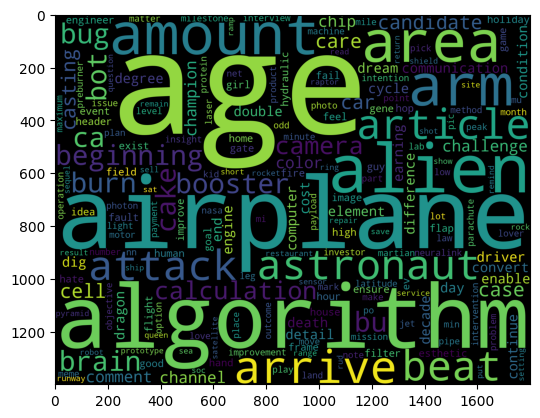

In [14]:
wordcloud = WordCloud(background_color='black',width=1800,height=1400).generate(wordslist)
plt.imshow(wordcloud)

In [15]:
with open("D:\ExcelR\Data Science\Assignments\Text Mining\positive-words.txt") as pos:
    positive = pos.read().split("\n")

In [16]:
positive_words = positive[35:]

In [17]:
positive_tweet = " ".join([word for word in df if word in positive_words])
pos_wordcloud = WordCloud(background_color='black',width=1800,height=1400).generate(positive_tweet)

In [18]:
with open (r"D:\ExcelR\Data Science\Assignments\Text Mining\negative-words.txt") as neg:
    negative = neg.read().split('\n')
    negative_words = negative[35:]

In [19]:
negative_tweets = " ".join([word for word in df if word in negative_words])

In [20]:
neg_wordcloud = WordCloud(background_color='black',width=1800,height=1400).generate(negative_tweets)

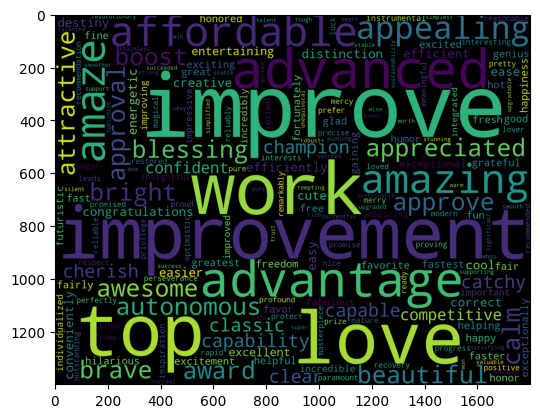

In [21]:
plt.imshow(pos_wordcloud)

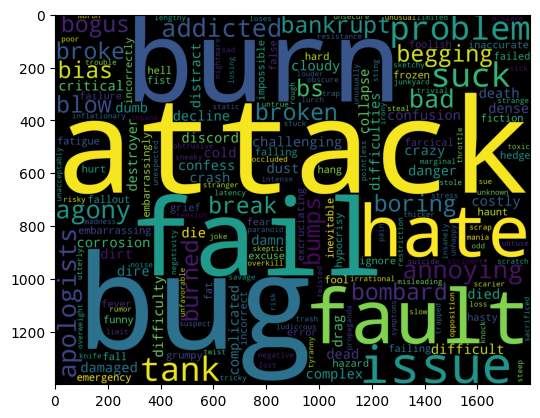

In [22]:
plt.imshow(neg_wordcloud)

In [23]:
from textblob import TextBlob
def sentiment_analysis(ds):
    sentiment = TextBlob(ds['Text']).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

data[["subjectivity", "polarity"]] = data.apply(sentiment_analysis, axis=1)
data

,Unnamed: 0,Text,subjectivity,polarity
0,1,im an alien,0.750000,-0.250000
1,2,aacarmack ray tracing on cyberpunk with hdr is...,0.000000,0.000000
2,3,great interview,0.750000,0.800000
3,4,doge is underestimated,0.000000,0.000000
4,5,congratulations tesla china for amazing execu...,0.366667,0.275000
...,...,...,...,...
1994,1995,true it sounds so surreal but the negative pr...,0.508333,0.111111
1995,1996,make sure to read ur terms amp conditions bef...,0.888889,0.500000
1996,1997,samwise gamgee,0.000000,0.000000
1997,1998,altho dumb and dumber is u0001f525u0001f525,0.500000,-0.375000


In [24]:
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
data['analysis'] = data['polarity'].apply(analysis)
data

,Unnamed: 0,Text,subjectivity,polarity,analysis
0,1,im an alien,0.750000,-0.250000,Negative
1,2,aacarmack ray tracing on cyberpunk with hdr is...,0.000000,0.000000,Neutral
2,3,great interview,0.750000,0.800000,Positive
3,4,doge is underestimated,0.000000,0.000000,Neutral
4,5,congratulations tesla china for amazing execu...,0.366667,0.275000,Positive
...,...,...,...,...,...
1994,1995,true it sounds so surreal but the negative pr...,0.508333,0.111111,Positive
1995,1996,make sure to read ur terms amp conditions bef...,0.888889,0.500000,Positive
1996,1997,samwise gamgee,0.000000,0.000000,Neutral
1997,1998,altho dumb and dumber is u0001f525u0001f525,0.500000,-0.375000,Negative


In [25]:
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
data['analysis'] = data['polarity'].apply(analysis)
data

,Unnamed: 0,Text,subjectivity,polarity,analysis
0,1,im an alien,0.750000,-0.250000,Negative
1,2,aacarmack ray tracing on cyberpunk with hdr is...,0.000000,0.000000,Neutral
2,3,great interview,0.750000,0.800000,Positive
3,4,doge is underestimated,0.000000,0.000000,Neutral
4,5,congratulations tesla china for amazing execu...,0.366667,0.275000,Positive
...,...,...,...,...,...
1994,1995,true it sounds so surreal but the negative pr...,0.508333,0.111111,Positive
1995,1996,make sure to read ur terms amp conditions bef...,0.888889,0.500000,Positive
1996,1997,samwise gamgee,0.000000,0.000000,Neutral
1997,1998,altho dumb and dumber is u0001f525u0001f525,0.500000,-0.375000,Negative


In [26]:
data['analysis'].value_counts()

Neutral     898
Positive    881
Negative    220
Name: analysis, dtype: int64

In [27]:
# Positive Tweets

(881/1999) * 100

44.072036018009

In [28]:
# Negative Tweets

(220/1999) * 100

11.005502751375689

In [29]:
# Neutral Tweets

(898/1999) * 100

44.922461230615305